## Prediction of Breast Cancer Severity with Multi-Omics Data

Can the QLattice reveal hidden mechanisms underlying breast cancer severity using multi-omics data (mutations, copy numbes, gene expression and protein levels)? 

![Breast Cancer Paper](https://els-jbs-prod-cdn.jbs.elsevierhealth.com/cms/attachment/de466e25-32e8-48dd-8f69-cee69e28b345/fx1.jpg)

**The Dataset**

* 705 breast tumour samples (611 patients survived, 94 patients died)



Four Data Types (n features):
* Copy Number Variations (860)
* Somatic Mutations (249)
* Gene Expression (604)
* Protein Expression (223)

**Total: 1936 features**

![The Data Types](https://d1g9yur4m4naub.cloudfront.net/image-handler/ts/20210121043242/ri/673/picture/2021/1/shutterstock_695774158.jpg)

The dataset is described in detail in the paper: https://www.cell.com/cell/fulltext/S0092-8674(15)01195-2.

# Python imports
In this notebook we will use only three python modules: the `feyn` module to access the QLattice, and the `pandas` module to access the data, and sklearn to split the data in test/train sets

In [1]:
#The feyn Python module is not installed on Kaggle by default so we have to pip install it first. 
#__Note__: the pip install will fail unless you enable *Internet* in the *settings* to the right --->
!pip install feyn==3.4.0

In [2]:
import feyn
import pandas as pd
import sklearn.model_selection

This version of Feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at https://abzu.ai/eula.

## Load the dataset

In [3]:
data = r"C:\Users\barca\Bio_AI\data.csv"
df = pd.read_csv(data)
df.iloc[:,1400:1500]

,cn_SNAP25,cn_FLRT3,cn_PCSK2,cn_PTPRT,cn_BCAS1,cn_CYP24A1,cn_BMP7,cn_PCK1,cn_ZBP1,cn_C20orf85,...,mu_CUBN,mu_DMD,mu_DNAH8,mu_GOLGA6L2,mu_HYDIN,mu_MUC12,mu_PLCE1,mu_RYR2,mu_USH2A,mu_AHNAK
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,2,2,2,2,2,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
702,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Target balance
Let's have a quick look at the balance of target variable

In [4]:
df["vital.status"].value_counts()

vital.status
0    611
1     94
Name: count, dtype: int64

The target variable is pretty unbalanced. Let's make sure we account for that when we split our data into train and test. We want to make sure to have the same ratio of cases/controls in both.

In [5]:
train, test = sklearn.model_selection.train_test_split(df,stratify=df["vital.status"], train_size=.66, random_state=42)

# Allocate a QLattice
The actual QLattice is a quantum simulator that runs on Abzu's hardware, but we can allocate one to use for our analysis with a single line of code. Hopefully the following line will get us one.

In [6]:
ql = feyn.connect_qlattice()

[WARNING: feyn._qlattice] - Deprecation: The connect_qlattice() is deprecated. Use the `feyn.QLattice()` constructor instead.


# Search for the best model

We are now ready to instruct the QLattice to search for the best mathematical model to explain the data. Here we use the high-level convenience function that does everything with sensible defaults: https://docs.abzu.ai/docs/guides/essentials/auto_run.html.

For more detailed control, we could use the primitives: https://docs.abzu.ai/docs/guides/primitives/using_primitives.html

### Let's start simple. We constrain the model to have 3 edges (e.g. 2 features and one interaction)
Essentially, we're asking the question "which two features best describe my data and how do they relate to eachother?".

In [7]:
ql.reset(random_seed=42)
models = ql.auto_run(
    train, 
    output_name="vital.status", 
    kind="classification", 
    criterion=None, 
    n_epochs=25, 
    max_complexity=3
)


<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="216.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 621 216.0" width="621" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="351" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="241" y="50.0"><title>vital.status
logistic:
w=4.6935
bias=-2.3147</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">vital.st..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="243" y="59.0">logistic</text><line stroke="#1E1E1E" x1="211" x2="241" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="50.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="71.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="59.0">1</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>rs_ALDH1L1
linear:
scale=0.141067
scale offset=4.422291
w=-1.680885
bias=1.4251</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">rs_ALDH1L1</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>rs_MMP1
linear:
scale=0.134570
scale offset=6.265840
w=4.064488
bias=2.6569</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">rs_MMP1</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text></svg><svg class="summary" height="79" width="180" x="351" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Training Metrics</text><line stroke="#1E1E1E" x1="0" x2="160" y1="19" y2="19" /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="34">Accuracy</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="34">0.892</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="49">AUC</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="49">0.622</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="64">Precision</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="64">0.833</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="79">Recall</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="79">0.242</text></svg><svg class="summary" height="79" width="90" x="531" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor=
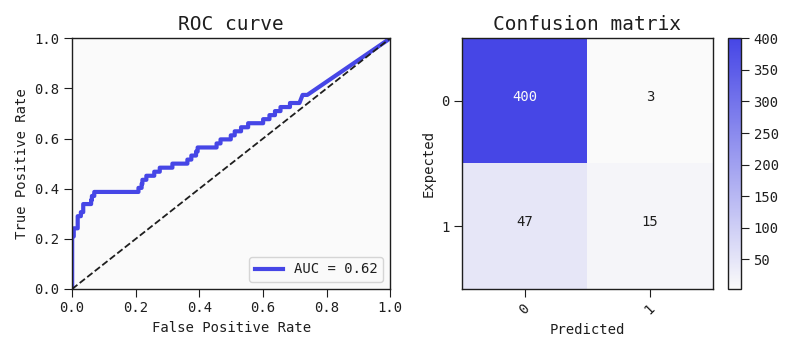
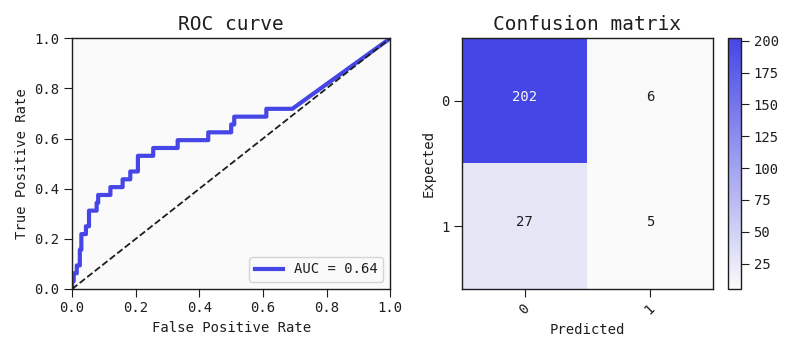

In [8]:
models[0].plot(train, test)

This is already a pretty good model given that a random forest only scores around AUC=0.66 (using hundreds of features and not being interpretable).

### Let's see what's going on in the model - Partial Plots

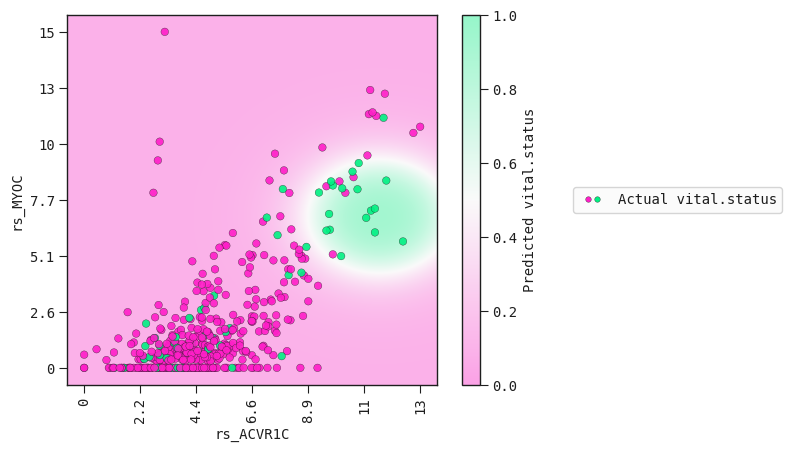

In [9]:
# Training Data
models[1].plot_response_2d(train)

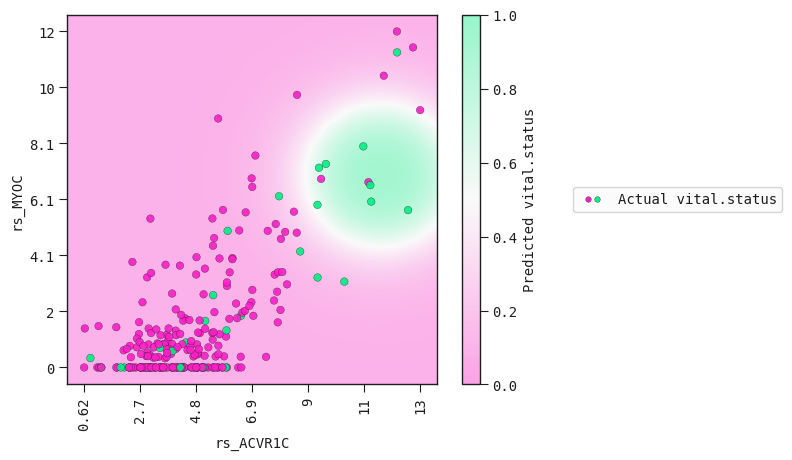

In [10]:
#Test Data
models[1].plot_response_2d(test)

Nice, the model generalises well on unseen data!

### Looking at the ROC curve

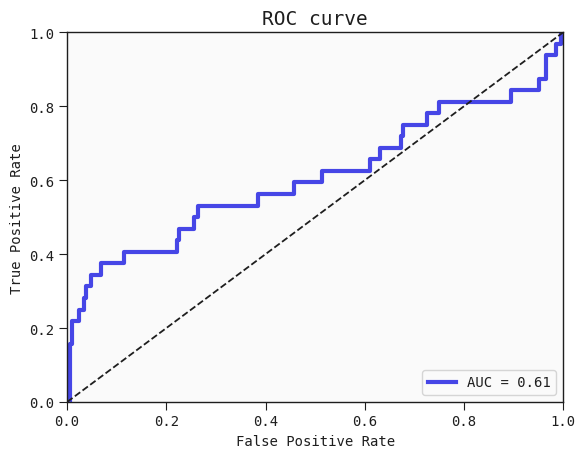

In [11]:
models[1].plot_roc_curve(test)

### Let's look at some other machine-learning methods

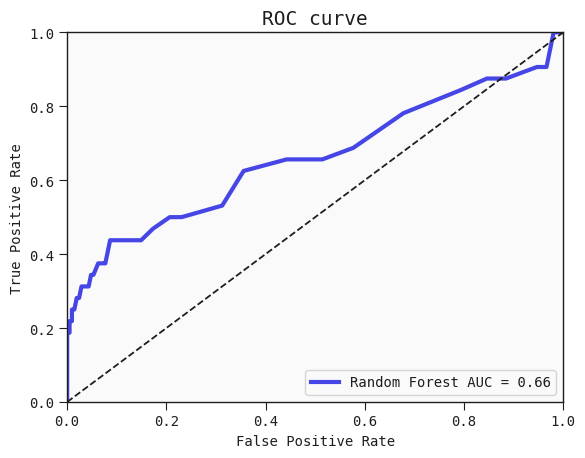

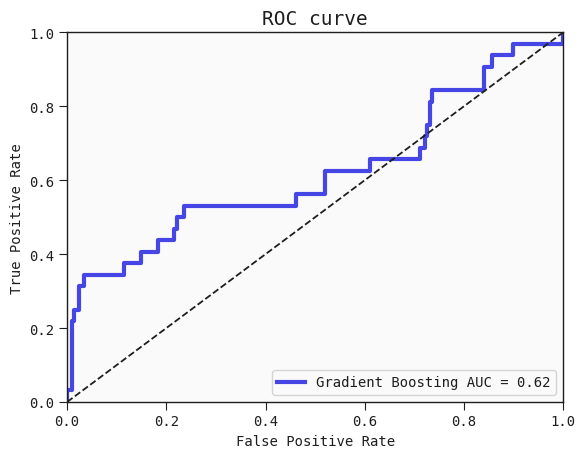

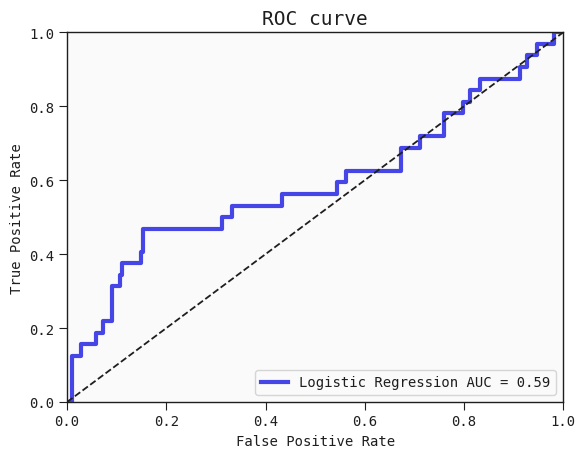

In [12]:
rf = feyn.reference.RandomForestClassifier(train, output_name="vital.status", random_state = 42)
gb = feyn.reference.GradientBoostingClassifier(train, output_name="vital.status", random_state = 42)
lr = feyn.reference.LogisticRegressionClassifier(train, output_name="vital.status", max_iter=10000, random_state = 42)

rf.plot_roc_curve(test, label="Random Forest")
gb.plot_roc_curve(test, label="Gradient Boosting")
lr.plot_roc_curve(test, label="Logistic Regression")

## The Multi-Omics Capabilities of the QLattice

### What happens when I let the QLattice explore for a while?
In this example I'm loading in a model that was trained for 200 iterations (using criterion = "bic" and max_complexity = 7). This took around 30 minutes on my machine (M1 Macbook Air 2021).

In [13]:
def feature_correlations_map(train, target, correlation='pearson', scale_features=True, abs_values = False):

    from sklearn.decomposition import PCA
    import plotly.express as px
    
    target_abs = f"{target}_abs"

    data_corr = train.corr(correlation).drop(target, axis = 0)

    target_corr = data_corr[target].values.copy()
    data_corr = data_corr.drop(target, axis = 1)

    features = data_corr.columns

    if scale_features:
        from sklearn.preprocessing import StandardScaler
        x = data_corr.loc[:, features].values
        data_corr = StandardScaler().fit_transform(x)

    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data_corr)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

    principalDf[target] = target_corr
    principalDf[target_abs] = np.abs(target_corr)
    principalDf['Features'] = features
    
    color_feature = target
    
    if abs_values:
        color_feature = target

    fig = px.scatter(principalDf, x="PC1",
                    y="PC2", color=color_feature, hover_name="Features", width=1000, height=800)

    fig.add_annotation(text=f'Variance explained <br>PC1: {"{:.0%}".format(pca.explained_variance_ratio_[0])} <br>PC2: {"{:.0%}".format(pca.explained_variance_ratio_[1])}', 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.98,
                    y=0.98,
                    bordercolor='black',
                    borderwidth=1)

    fig.show()

In [36]:
multi_model = feyn.Model.load(r"C:\Users\barca\Bio_AI\BRCA Multi-Omics\model1_200its_mc7.model")

[WARNING: feyn._model] - Deprecation: Your model is serialized with an old version of Feyn. Save the model again to get the updated serialization. Future versions will not load this file.


<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="248.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 861 248.0" width="861" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="591" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="481" y="50.0"><title>vital.status
logistic:
w=-2.8190
bias=-2.3839</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="71.5">vital.st..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="483" y="59.0">logistic</text><line stroke="#1E1E1E" x1="451" x2="481" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="50.0"><title>multiply</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="71.5">multiply</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="59.0">1</text><line stroke="#1E1E1E" x1="331" x2="361" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="331" x2="361" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="241" y="20.0"><title>mu_TNXB
linear:
scale=2.000000
scale offset=0.030733
w=-6.401883
bias=-3.8363</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="41.5">mu_TNXB</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="243" y="29.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="80.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="101.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="89.0">3</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="88.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="106.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="20.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">4</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="28.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="46.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>rs_KRT23
linear:
scale=0.151624
scale offset=8.622495
w=-1.196604
bias=0.9873</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">rs_KRT23</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">5</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>rs_APOB
linear:
scale=0.149502
scale offset=2.39693
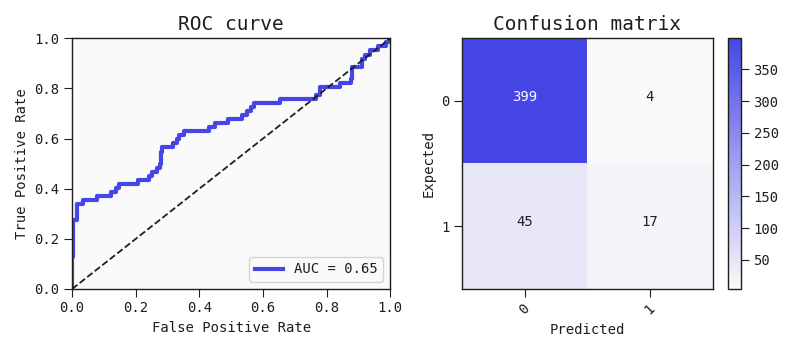
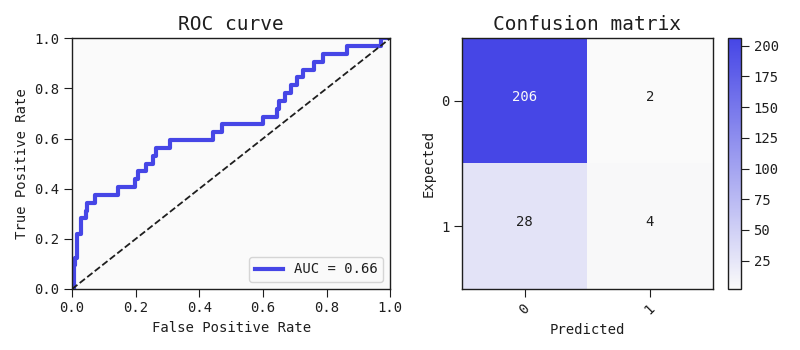

In [41]:
multi_model.plot(train, test)

Nice AUC! Interestingly, this model includes three different data types: Gene expression (rs), copy numbers (cn) and mutations (mu).
We didn't even have to do anything special to the data, the QLattice figured out the correct normalisations itself!

### Looking at people without TNXB mutations
In people **without** TNXB mutations both high APOB and KRT23 gene expression are associated with death.

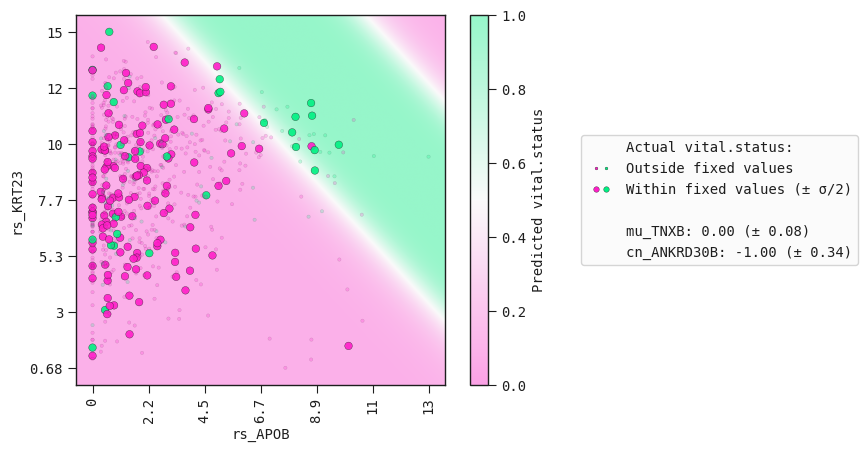

In [42]:
multi_model.plot_response_2d(df, fixed = {"mu_TNXB" : 0, "cn_ANKRD30B" : -1})

### Looking at TNXB mutation carriers
In people **with** a TNXB mutation only high APOB is required for a case to be fatal.

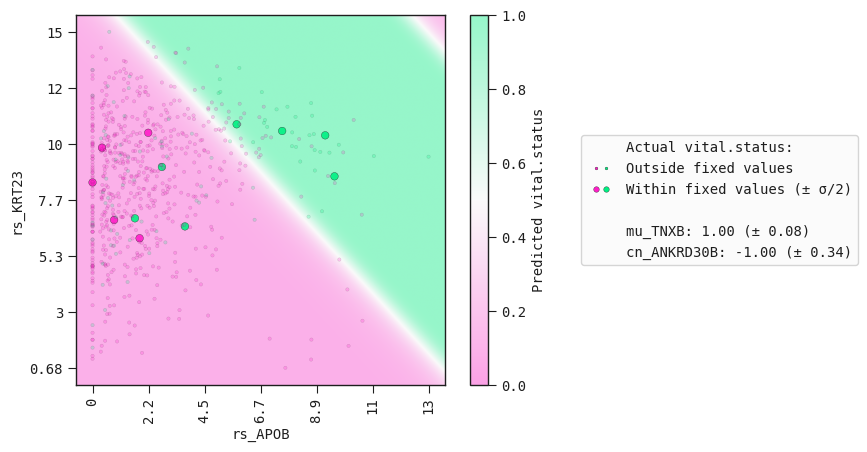

In [43]:
multi_model.plot_response_2d(df, fixed = {"mu_TNXB" : 1, "cn_ANKRD30B" : -1})

The QLattice identified a **genetic switch**, i.e., a mutation in a gene (TNXB) that seems to drive cancer severity. In the top figure, we show the decision boundary for non-TNXB mutation carriers: Here, individuals with high APOB and KRT23 gene-expression seem to be at risk of dying.
In the bottom figure, we show the predictions for TNXB-mutation carriers. Here, high levels of APOB are predicted to be detrimental, no matter the levels of KRT23.


## Conclusion

The QLattice seamlessly provides insights into complex datasets and outperforms traditional machine-learning methods. Find a related blog post here https://www.abzu.ai/articles/multi-omics-analysis-made-easy-a-breast-cancer-example.
Our latest biomarker preprint can be found here https://www.biorxiv.org/content/10.1101/2022.01.14.475226v2.